Problem Statement:The dataset for the project consists of test scores and demographics of colleges and university in the United States.The objective is to extract insights by inspecting and comparing variables.


In [ ]:
#Given below is the analysis strategy for the project:
#1.Reading the data :For the csv file of the data, read_csv command will be used. For initializing the project, packages such pandas , matplotlin ,seaborn and numphy will be used.Mostly seaborn will be used for the visualization of the data as it is excellent for in-depth analysis and works well with dataframes.
#2.Manipulating Data:In the given dataset , there are 2 exceptions present:
#a. Privacy Supressed Values : For such type of values , we will replace them with zero.
#b. Missing Values :We will fill such values with '0' or will filter them while using the given variable containing them in the operation.
#3.Analysis: For analysis we will(psuedo code),
   #a.Provide an index ,to enable faster retrieval of data
   #b.Check whether all the columns are of correct datatype, if not change them
   #c.Use head(),tail() for inspecting the data
   #d.Use mathematical operations,group by and descriptive statistical formulas for providing insights regarding the data

In [67]:
import pandas as ps
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [68]:
#Reading in the file
scores = ps.read_csv('CollegeScoreCard_Project.csv')

In [3]:
#Setting index 
scores.set_index('id', inplace=True)

In [72]:
#Replacing the Privacy Suprressed Values
scores.replace({'PrivacySuppressed': 0}, inplace=True)

In [73]:
scores.head()

,id,name,city,state,men_only,women_only,act_med,sat_avg,enrollment,white,...,hispanic,asian,american_native,pacific_islander,multiple_race,non_resident,unknown_race,tuition,postgrad_income_10yr,completion_rate
0,123952,Southern California Institute of Architecture,Los Angeles,CA,0,0,NaN,NaN,257.0,0.1479,...,0.1401,0.1362,0.0000,0.0039,0.0156,0.5525,0.0000,56404,43100,0.5327
1,111081,California Institute of the Arts,Valencia,CA,0,0,NaN,NaN,951.0,0.3975,...,0.1388,0.1136,0.0063,0.0021,0.0852,0.1514,0.0410,49256,37900,0.6109
2,458210,West Coast University-Orange County,Anaheim,CA,0,0,NaN,NaN,1869.0,0.2274,...,0.2022,0.4553,0.0027,0.0193,0.0284,0.0000,0.0235,47939,54900,0
3,109651,Art Center College of Design,Pasadena,CA,0,0,NaN,NaN,1897.0,0.1587,...,0.1223,0.3542,0.0032,0.0032,0.0438,0.2899,0.0100,46080,53600,0.7073
4,443331,West Coast University-Los Angeles,North Hollywood,CA,0,0,NaN,NaN,1556.0,0.3136,...,0.2224,0.3310,0.0045,0.0167,0.0424,0.0064,0.0334,45550,54900,0


In [74]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 21 columns):
id                      2326 non-null int64
name                    2326 non-null object
city                    2326 non-null object
state                   2326 non-null object
men_only                2326 non-null int64
women_only              2326 non-null int64
act_med                 1227 non-null float64
sat_avg                 1249 non-null float64
enrollment              2046 non-null float64
white                   2046 non-null float64
black                   2046 non-null float64
hispanic                2046 non-null float64
asian                   2046 non-null float64
american_native         2046 non-null float64
pacific_islander        2046 non-null float64
multiple_race           2046 non-null float64
non_resident            2046 non-null float64
unknown_race            2046 non-null float64
tuition                 2326 non-null int64
postgrad_income_10yr    2069 n

In [75]:
#Converting variables postgrad_income_10yr and completion_rate to Float to use in Mathematical Calculations
scores.postgrad_income_10yr = scores.postgrad_income_10yr.astype(float)
scores.completion_rate = scores.completion_rate.astype(float)

In [76]:
scores.head()

,id,name,city,state,men_only,women_only,act_med,sat_avg,enrollment,white,...,hispanic,asian,american_native,pacific_islander,multiple_race,non_resident,unknown_race,tuition,postgrad_income_10yr,completion_rate
0,123952,Southern California Institute of Architecture,Los Angeles,CA,0,0,NaN,NaN,257.0,0.1479,...,0.1401,0.1362,0.0000,0.0039,0.0156,0.5525,0.0000,56404,43100.0,0.5327
1,111081,California Institute of the Arts,Valencia,CA,0,0,NaN,NaN,951.0,0.3975,...,0.1388,0.1136,0.0063,0.0021,0.0852,0.1514,0.0410,49256,37900.0,0.6109
2,458210,West Coast University-Orange County,Anaheim,CA,0,0,NaN,NaN,1869.0,0.2274,...,0.2022,0.4553,0.0027,0.0193,0.0284,0.0000,0.0235,47939,54900.0,0.0000
3,109651,Art Center College of Design,Pasadena,CA,0,0,NaN,NaN,1897.0,0.1587,...,0.1223,0.3542,0.0032,0.0032,0.0438,0.2899,0.0100,46080,53600.0,0.7073
4,443331,West Coast University-Los Angeles,North Hollywood,CA,0,0,NaN,NaN,1556.0,0.3136,...,0.2224,0.3310,0.0045,0.0167,0.0424,0.0064,0.0334,45550,54900.0,0.0000


In [77]:
#Analysis using groupby
scores_state_group = scores.groupby('state')
scores_state_group['sat_avg'].describe().head()

#Here,the Average SAT scores have been grouped on the basis of state ,and all descriptive statistics have been calculated and displayed.

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AK,1.0,1060.000000,NaN,1060.0,1060.00,1060.0,1060.00,1060.0
AL,23.0,1031.652174,125.527834,765.0,982.00,1013.0,1123.00,1257.0
AR,16.0,1057.875000,110.229987,845.0,996.50,1056.0,1120.75,1287.0
AZ,6.0,1082.833333,65.873869,963.0,1078.75,1085.0,1126.50,1147.0
CA,71.0,1113.859155,171.473638,870.0,985.00,1078.0,1235.00,1555.0


In [78]:
######Custom Functions###

## Creation of a function to calculate percentage of Asian Students for Each State
def top_5_mean(series):
    series_sorted = series.sort_values(ascending=False)
    top_5 = series_sorted[:5]
    mean_val = top_5[top_5 > 0].mean()

    return mean_val

scores_state_group.agg({'asian': top_5_mean}).head()

,asian
state,
AK,0.037333
AL,0.041080
AR,0.034380
AZ,0.068000
CA,0.612280


In [79]:
###Custom Function ###
#Top 5 Colleges which have best return of investment  -Average of low tuition and high post graduate income
scores_name_group = scores.groupby('name')

def roi_avg(group):

    tuition_norm = group['tuition']

    income_norm = group['postgrad_income_10yr']

    norm_avg = (tuition_norm + income_norm) / 2
    
    top_5 = norm_avg.sort_values(ascending=False)[:5]
    
    top_5_mean = top_5[top_5 > 0].mean()

    return top_5_mean

avg_scores = scores_name_group.apply(roi_avg)
avg_scores.sort_values(ascending=False).head()

name
Medical College of Wisconsin                            125000.0
Oklahoma State University Center for Health Sciences    120950.0
West Virginia School of Osteopathic Medicine            112150.0
New York Medical College                                109750.0
Icahn School of Medicine at Mount Sinai                 101400.0
dtype: float64

INSIGHTS USING PANDAS

In [81]:
#Total Number of Women Colleges
scores['women_only'].sum()

# Total Number of Women Only Colleges in the Country :38


38

In [17]:
#College which has maximum enrollment
scores.loc[scores['enrollment'].idxmax() ,'name']

#College which has the maximum enrollment :University of Phoenix -Arizona

'University of Phoenix-Arizona'

In [82]:
#Top 5 colleges which have highest tuition fees
scores[['name','tuition','state']].sort_values('tuition', ascending=False).head(5)


,name,tuition,state
0,Southern California Institute of Architecture,56404,CA
1,California Institute of the Arts,49256,CA
2,West Coast University-Orange County,47939,CA
3,Art Center College of Design,46080,CA
4,West Coast University-Los Angeles,45550,CA


In [19]:
#Average SAT score for all the colleges
scores['sat_avg'].mean()

#Average SAT score for all the colleges throughout the country:1065

1065.0336269015213

In [83]:
#College with highest post graduation income
max_income = scores['postgrad_income_10yr'].max()
scores.loc[scores['postgrad_income_10yr'] == max_income ,'name']

# Medical College of Wisconsin has the highest post graduate income

2138    Medical College of Wisconsin
Name: name, dtype: object

UNIVARIATE PLOTS 

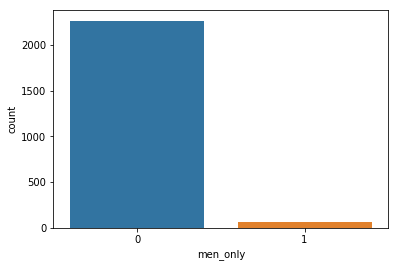

In [21]:
#UNIVARIATE PLOT
#How many are Male Only Colleges?
sb.countplot(x='men_only', data=scores)

# From the plot we see the count of Men only Colleges is much less than that of Non-Men Colleges. The total number of Men-Only colleges in the country:61


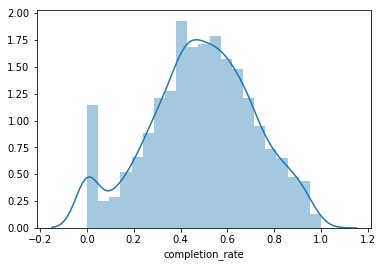

In [84]:
#UNIVARIATE PLOT
#What is the distribution of completion rate ?
sb.distplot(scores.loc[~scores['completion_rate'].isna(), 'completion_rate'])

# From the plot , it can be gathered that the maximum completion rate is around 0.4 across US

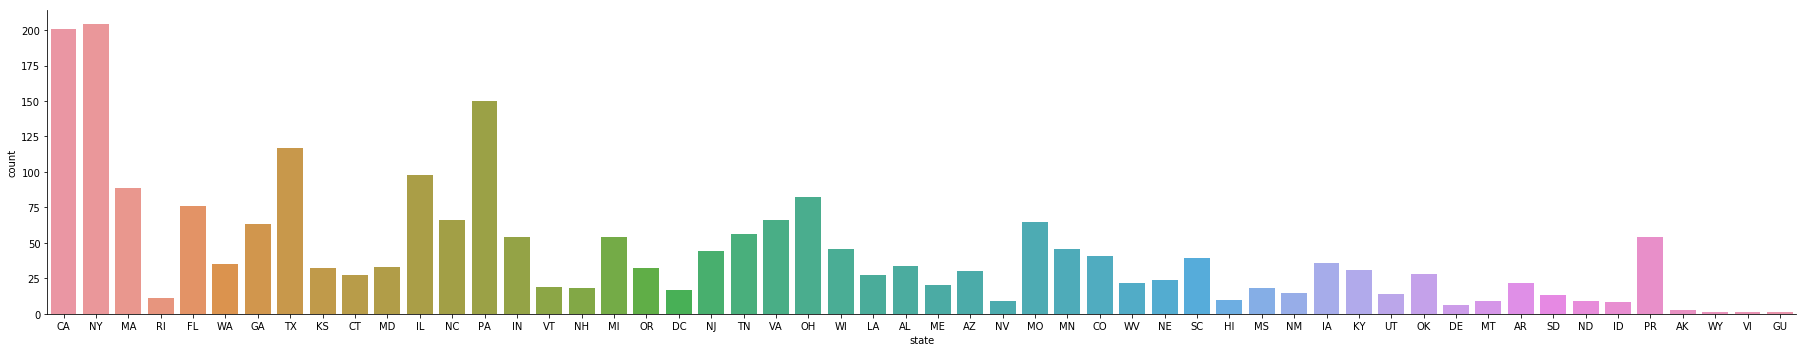

In [36]:
## Univariate Plot
##Count of Colleges in each state
sb.catplot(x='state',data =scores,orient = 'h',kind= 'count',aspect = 5)

# From the plot , we can see that the maximum number of colleges is in the state of New York.

##Please Note: In case the graph is not visible, double click on the graph.

BIVARIATE PLOTS

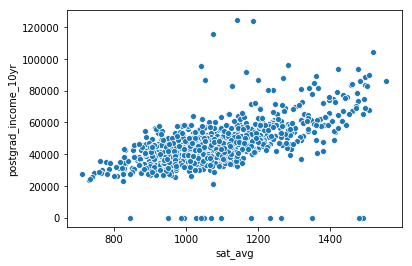

In [85]:
#BIVARIATE PLOT
#Relationship between SAT & Post Graduate Income
g = sb.scatterplot(x = 'sat_avg' ,y = 'postgrad_income_10yr',data = scores)

#From the plot, it can be that there is a mostly increasing linear relationship between SAT scores and Post Graduate Income.

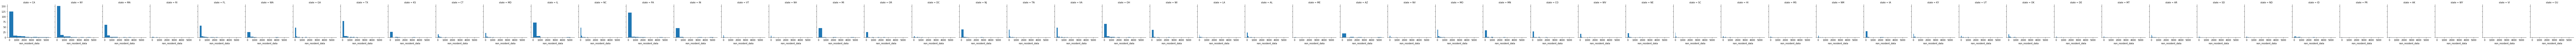

In [9]:
#Bivariate Plot
# Distribution of Non-Resident Student in each State
scores['non_resident_data']  = scores['enrollment'] * scores['non_resident']
g = sb.FacetGrid(scores, col = "state")
g.map(plt.hist, "non_resident_data")
plt.show()

# We can see that state of New York has the highest number of Non - Resident Students , which will be true as the number of colleges is also the highest for NewYork.


##Please Note: In case the graph is not visible, double click on the graph.

[(500, 59224.2010842294)]

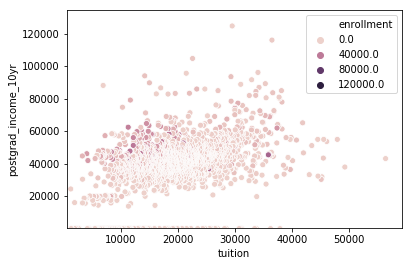

In [66]:
##Multivariate Plot
## Scatterplot describing the relationship between Tuition and 10 year Postgraduate Income base on enrollment
g = sb.scatterplot(x = 'tuition' ,y = 'postgrad_income_10yr',hue = 'enrollment',data = scores)
g.set(ylim=(500, None)) 
g.set(xlim=(500, None))

## It can be inferred that the enrollment is highest where the tuition and post graduate income is at the higher end.

In [ ]:
## Conclusions: From the CollegeScore Card , it can be summarized that :
##1.NewYork has the highest number of colleges and the out-of state students
##2.Also trends suggest that ,as the SAT scores increases , the 10 year post graduate income increases. This should be true as higher ranked colleges require higher SAT scores but also provide better future oppurtunities.
##3.There are a low number of Women-Only(38) and Men-Only Colleges(61) all across the country.
##4.The college with the highest tuition is "Southern California Institute of Architecture"
##5.College which has the maximum enrollment :University of Phoenix -Arizona
##6.The highest average completion rate for all the colleges in the United States is around 0.4
##7.Finally , trends suggest that relationship between tuition and 10 year Post Graduate Income is more concentrated in the tuition range of 10000-30000 and postgrad_income_10yr range of 25000-50000.